In [1]:
import datetime
import pandas as pd
from lifelines import KaplanMeierFitter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def show_sample(df):
    print(f'len = {len(df)}')
    display(df[:2])

In [3]:
preprints_df = pd.read_csv(
    "/home/thielk/gitlab/annorxiver/biorxiv/exploratory_data_analysis/output/biorxiv_article_metadata.tsv",
    sep="\t",
)

In [4]:
preprints_df["date_received"] = pd.to_datetime(preprints_df["date_received"])

In [5]:
xml_df = (
    preprints_df.sort_values(by="date_received")
    .dropna(subset=["date_received"])
    .groupby("doi")
    .first()
)

In [6]:
print(f'preprints_df len: {len(preprints_df)}')
show_sample(xml_df)

preprints_df len: 110717
len = 80395


,author_type,heading,category,document,date_received
doi,,,,,
10.1101/000026,regular article,new results,genetics,000026.xml,2013-10-17
10.1101/000042,regular article,new results,genomics,000042.xml,2013-10-18


In [7]:
header_list = [
     'document', # file_path
     'title',
     'version',
     'category',
     'author_type',
     'heading',
     'doi',
     'publisher',  # actually, the publisher of biorxiv Cold Spring Harbor Laboratory	
     'rcvd_day',
     'rcvd_month',
     'rcvd_year']
xmlmeta_df_0 = pd.read_csv(
    "/home/will/notebooks/rxiv/biorxiv-basic-meta.tsv",
    names=header_list,
    sep="\t",
)

### Get crossref member data
Downloaded from https://www.crossref.org/reporting/members-with-closed-references/ (and open)

In [8]:
xref_member_closed_df = pd.read_csv('/home/will/notebooks/rxiv/crossref-members-closed.csv')
xref_member_open_df = pd.read_csv('/home/will/notebooks/rxiv/crossref-members-open.csv')
xref_member_df = pd.concat([xref_member_closed_df, xref_member_open_df])
xref_member_df['doi_prefix'] = xref_member_df['Sponsored member & prefix'].str.extract(r'(10.[0-9]+)$')
xref_member_df[['mem_name', 'mem_id']] = xref_member_df['Member Name & ID'].str.extract(r'(.*) \(ID ([0-9]+)\)$')
show_sample(xref_member_df)

len = 2504


,Member Name & ID,Sponsored member & prefix,Reference Visibility,Total Backfile DOIs,Total Current DOIs,Deposits Backfile References,Deposits Current References,doi_prefix,mem_name,mem_id
0,AACE Corp (American Association of Clinical En...,test,closed,3388,773,True,True,NaN,AACE Corp (American Association of Clinical En...,2653
1,AACE Corp (American Association of Clinical En...,American Association of Clinical Endocrinologi...,limited,3388,773,True,True,10.4158,AACE Corp (American Association of Clinical En...,2653


In [9]:
xref_pref_table = xref_member_df[['doi_prefix', 'mem_name']]
xref_pref_table[:5]

,doi_prefix,mem_name
0,NaN,AACE Corp (American Association of Clinical En...
1,10.4158,AACE Corp (American Association of Clinical En...
2,10.26434,American Chemical Society (ACS)
3,10.1021,American Chemical Society (ACS)
4,10.29200,American Chemical Society (ACS)


In [10]:
xref_pref_table.to_csv("xref_pref_table.tsv", sep="\t", index=False)

### Get extraction from XML that is done in Databricks
Databricks notebook: https://elsevier.cloud.databricks.com/#notebook/2490918/command/2490924

In [11]:
header_list = [
     'document', # file_path
     'title',
     'version',
     'category',
     'author_type',
     'heading',
     'doi',
     'publisher',  # actually, the publisher of biorxiv Cold Spring Harbor Laboratory	
     'rcvd_day',
     'rcvd_month',
     'rcvd_year']
xmlmeta_df_0 = pd.read_csv(
    "/home/will/notebooks/rxiv/biorxiv-basic-meta.tsv",
    names=header_list,
    sep="\t",
)

In [12]:
xmlmeta_df_0.groupby('publisher').count()

,document,title,version,category,author_type,heading,doi,rcvd_day,rcvd_month,rcvd_year
publisher,,,,,,,,,,
1,9573,9573,9573,9573,9573,9573,9573,9573,9573,9573
10,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676
11,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989
12,8566,8566,8566,8566,8566,8566,8566,8566,8566,8566
2,9641,9641,9641,9641,9641,9641,9641,9641,9641,9641
3,11094,11094,11094,11094,11094,11094,11094,11094,11094,11094
4,10546,10546,10546,10546,10546,10546,10546,10546,10546,10546
5,8621,8621,8621,8621,8621,8621,8621,8621,8621,8621
6,8446,8446,8446,8446,8446,8446,8446,8446,8446,8446


In [13]:
xmlmeta_df_0[:2]

,,document,title,version,category,author_type,heading,doi,publisher,rcvd_day,rcvd_month,rcvd_year
file_path,title,version,category,author_type,heading,doi,publisher,rcvd_day,rcvd_month,rcvd_year,institution,declaration
rxiv-20200515/Current_Content/December_2018/Batch_#21/e2aba4e3-6c07-1014-b4b3-a89c15eac2b5/content/505362.xml,Saturation mutagenesis of disease-associated regulatory elements,1.1,Genetics,Regular Article,New Results,10.1101/505362,Cold Spring Harbor Laboratory,22,12,2018,"Department of Genome Sciences, University of W...",authors declar


In [14]:
xmlmeta_df_0['date_received'] = xmlmeta_df_0['rcvd_year'] + '-' + xmlmeta_df_0['rcvd_month'] + '-' + xmlmeta_df_0['rcvd_day']
xmlmeta_df_0["date_received"] = pd.to_datetime(xmlmeta_df_0["date_received"], errors='coerce')
xmlmeta_df = xmlmeta_df_0.dropna(subset=["date_received"]).drop(['rcvd_day', 'rcvd_month', 'rcvd_year'], axis=1)
show_sample(xmlmeta_df_0)

len = 110723


,,document,title,version,category,author_type,heading,doi,publisher,rcvd_day,rcvd_month,rcvd_year,date_received
file_path,title,version,category,author_type,heading,doi,publisher,rcvd_day,rcvd_month,rcvd_year,institution,declaration,NaT
rxiv-20200515/Current_Content/December_2018/Batch_#21/e2aba4e3-6c07-1014-b4b3-a89c15eac2b5/content/505362.xml,Saturation mutagenesis of disease-associated regulatory elements,1.1,Genetics,Regular Article,New Results,10.1101/505362,Cold Spring Harbor Laboratory,22,12,2018,"Department of Genome Sciences, University of W...",authors declar,NaT


In [15]:
xmlmeta_df = xmlmeta_df.groupby('doi').first()
show_sample(xmlmeta_df)

len = 0


,document,title,version,category,author_type,heading,publisher,date_received
doi,,,,,,,,


### Read data retrived from the API

In [16]:
api_df = pd.read_csv(
    "/home/thielk/gitlab/ctha-biorxiv-analysis/notebooks/biorxiv_published_api_data.tsv", sep="\t"
)

In [17]:
api_df[api_df["published_date"].str.contains(":")]

,biorxiv_doi,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count
7791,10.1101/206003,10.1162/jocn_a_01258,Signposts in the fog: Objects facilitate scene...,neuroscience,2017-10-19,2018-03-21:1-11,1
8780,10.1101/192518,10.1162/jocn_a_01281,Stimulus familiarity and expectation jointly m...,neuroscience,2017-09-22,2018-05-15:1-12,2
12438,10.1101/162495,10.1111/desc.12744,Laterality of the frontal aslant tract (FAT) e...,neuroscience,2017-07-12,2018-08-30:e12744,1
14422,10.1101/249367,10.1091/mbc.E18-08-0515,Methionine coordinates a hierarchically organi...,systems biology,2018-01-17,2018-10-24:mbcE18080,0
14787,10.1101/228379,10.1096/fj.201800242R,KDM2B is a histone H3K79 demethylase and induc...,genetics,2017-12-04,2018-05-15:fj2018002,3
15413,10.1101/229146,10.1017/S1355617718000929,Longitudinal standards for mid-life cognitive ...,neuroscience,2017-12-04,2018-11-28:1-14,0
21487,10.1101/327080,10.1002/prca.201800100,Urine proteome changes in a TNBS-induced colit...,molecular biology,2018-05-21,2019-05-16:e1800100,0
21506,10.1101/388579,10.1017/S1431927619000606,Fluorescence-Based Detection of Fusion State o...,biophysics,2018-08-10,2019-05-14:1-8,0
23646,10.1101/455055,10.1080/0284186X.2019.1633015,Influence of mutagenic versus non-mutagenic pr...,cancer biology,2018-10-29,2019-07-4:1-9,0


In [18]:
api_df['doi_prefix'] = api_df['published_doi'].str.split('/').str[0]

In [19]:
api_df[:5]

,biorxiv_doi,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count,doi_prefix
0,10.1101/001081,10.1093/bioinformatics/btu121,PyRAD: assembly of de novo RADseq loci for phy...,Bioinformatics,2013-12-03,2014-03-05,184,10.1093
1,10.1101/001297,10.1371/journal.pone.0085203,Aerodynamic characteristics of a feathered din...,Biophysics,2013-12-10,2014-01-15,11,10.1371
2,10.1101/000422,10.3389/fgene.2014.00013,On the optimal trimming of high-throughput mRN...,Bioinformatics,2013-11-14,2014-01-31,44,10.3389
3,10.1101/001396,10.1162/NECO_a_00568,Parametric inference in the large data limit u...,Biophysics,2013-12-13,2014-03-10,4,10.1162
4,10.1101/002980,10.1016/j.bpj.2014.01.012,Genetic drift suppresses bacterial conjugation...,Biophysics,2014-02-24,2014-02-18,10,10.1016


In [20]:
doi_prefixes_df = api_df['doi_prefix'].drop_duplicates()

In [21]:
len(doi_prefixes_df)

290

In [22]:
index = api_df[api_df["published_date"].str.contains(":")].index
api_df.loc[index, "published_date"] = (
    api_df.loc[index, "published_date"].str.split(":").str[0]
)

In [23]:
for col in ["preprint_date", "published_date"]:
    api_df[col] = pd.to_datetime(api_df[col])

In [24]:
api_df.set_index("biorxiv_doi")

,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count,doi_prefix
biorxiv_doi,,,,,,,
10.1101/001081,10.1093/bioinformatics/btu121,PyRAD: assembly of de novo RADseq loci for phy...,Bioinformatics,2013-12-03,2014-03-05,184,10.1093
10.1101/001297,10.1371/journal.pone.0085203,Aerodynamic characteristics of a feathered din...,Biophysics,2013-12-10,2014-01-15,11,10.1371
10.1101/000422,10.3389/fgene.2014.00013,On the optimal trimming of high-throughput mRN...,Bioinformatics,2013-11-14,2014-01-31,44,10.3389
10.1101/001396,10.1162/NECO_a_00568,Parametric inference in the large data limit u...,Biophysics,2013-12-13,2014-03-10,4,10.1162
10.1101/002980,10.1016/j.bpj.2014.01.012,Genetic drift suppresses bacterial conjugation...,Biophysics,2014-02-24,2014-02-18,10,10.1016
...,...,...,...,...,...,...,...
10.1101/2020.05.04.077420,10.1016/j.csbj.2020.05.015,Abasy Atlas v2.2: The most comprehensive and u...,systems biology,2020-05-05,2020-05-16,0,10.1016
10.1101/851618,10.7554/eLife.50138,Axon-dependent expression of YAP/TAZ mediates ...,neuroscience,2019-11-21,2020-05-21,0,10.7554
10.1101/2020.03.04.977322,10.1126/sciadv.aba1933,Multimodal mapping of neural activity and cere...,neuroscience,2020-03-05,2020-05-22,0,10.1126


In [25]:
merged_df = pd.merge(
    xml_df,
    #xmlmeta_df,
    api_df.set_index("biorxiv_doi"),
    left_index=True,
    right_index=True,
    how="outer",
)

In [26]:
show_sample(merged_df)

len = 80440


,author_type,heading,category,document,date_received,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count,doi_prefix
10.1101/000026,regular article,new results,genetics,000026.xml,2013-10-17,10.1371/journal.pgen.1004412,A Population Genetic Signature of Polygenic Lo...,Genetics,2013-11-07,2014-08-07,133.0,10.1371
10.1101/000042,regular article,new results,genomics,000042.xml,2013-10-18,10.1038/nrg3723,Routes for breaching and protecting genetic pr...,Genomics,2013-11-07,2014-06-01,116.0,10.1038


In [27]:
merged_df["document"].isna().sum()


45

In [28]:
merged_df["published_doi"].isna().sum()

43429

In [29]:
len(merged_df)

80440

In [30]:
# lets ignore papers we don't have xmls for
merged_df = pd.merge(
    xml_df,
    #xmlmeta_df,
    api_df.set_index("biorxiv_doi"),
    left_index=True,
    right_index=True,
    how="left",
)

In [31]:
len(merged_df)

80395

In [32]:
merged_df = pd.merge(
    merged_df,
    xref_pref_table,
    on='doi_prefix'
)

In [33]:
print(len(merged_df))
merged_df[:3]

79899


,author_type,heading,category,document,date_received,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count,doi_prefix,mem_name
0,regular article,new results,genetics,000026.xml,2013-10-17,10.1371/journal.pgen.1004412,A Population Genetic Signature of Polygenic Lo...,Genetics,2013-11-07,2014-08-07,133.0,10.1371,Public Library of Science (PLoS)
1,regular article,new results,evolutionary biology,000109.xml,2013-10-26,10.1371/journal.pgen.1004410,Speciation and introgression between Mimulus n...,Evolutionary Biology,2013-11-07,2014-06-26,43.0,10.1371,Public Library of Science (PLoS)
2,regular article,new results,cancer biology,000141.xml,2013-11-01,10.1371/journal.pcbi.1003433,Microenvironmental variables must influence in...,Cancer Biology,2013-11-07,2014-01-16,21.0,10.1371,Public Library of Science (PLoS)


In [34]:
merged_df["published"] = ~merged_df["published_doi"].isna()

In [35]:
# I should change this to when the data was pulled, but I didn't record that for now :(
merged_df.loc[merged_df["published"], "observation_date"] = merged_df.loc[
    merged_df["published"], "published_date"
]
merged_df.loc[~merged_df["published"], "observation_date"] = datetime.datetime.today()

In [36]:
merged_df["observation_duration"] = (
    merged_df["observation_date"] - merged_df["date_received"]
)

In [37]:
(merged_df["observation_duration"] < pd.Timedelta(0)).sum()

93

In [38]:
merged_df = merged_df[merged_df["observation_duration"] > pd.Timedelta(0)]

In [39]:
merged_df["observation_duration"].astype("timedelta64[s]")


0        25401600.0
1        20995200.0
2         6566400.0
3        14083200.0
4         6739200.0
            ...    
79894     8467200.0
79895    10972800.0
79896    12096000.0
79897     5097600.0
79898    15984000.0
Name: observation_duration, Length: 79786, dtype: float64

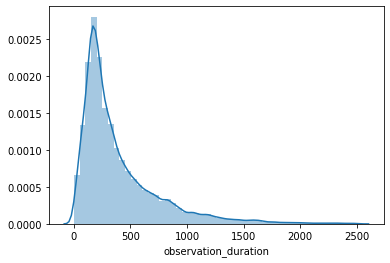

In [40]:
ax = sns.distplot(merged_df["observation_duration"].astype("timedelta64[D]")) # timedelta in days

In [41]:
kmf = KaplanMeierFitter()

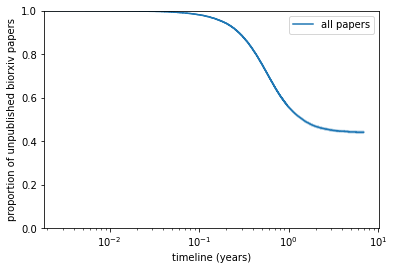

In [42]:
kmf.fit(
    merged_df["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
    event_observed=merged_df["published"],
)
ax = kmf.plot(label="all papers", logx=True)
_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

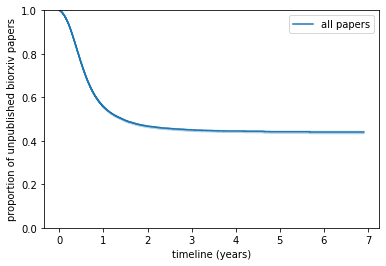

In [43]:
ax = kmf.plot(label="all papers", logx=False)
_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

In [44]:
kmf.median_survival_time_

1.4273972602739726

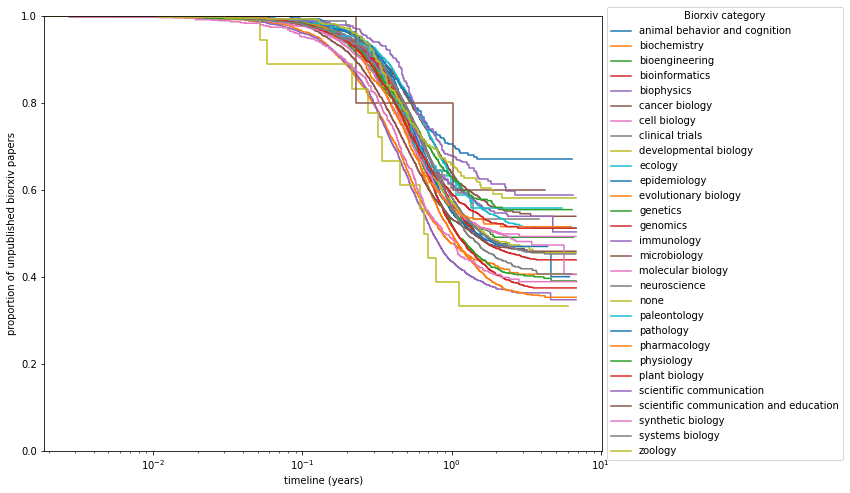

In [45]:
f = plt.figure(figsize=(10, 8))

ax = None
for category, cat_group in merged_df.groupby("category"):
    kmf.fit(
        cat_group["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
        event_observed=cat_group["published"],
    )
    ax = kmf.plot(label=category, ax=ax, ci_show=False, logx=True)

# Shrink current axis by 20%
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Biorxiv category")

_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

In [46]:
def run_plot_by_group(df, group_name='category', min_group_size=0, selected=None):
    f = plt.figure(figsize=(10, 8))
    ax = None
    for category, cat_group in df.groupby(group_name):
        if selected is not None and category not in selected:
            continue
        if len(cat_group) < min_group_size:
            continue
        kmf.fit(
            cat_group["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
            event_observed=cat_group["published"],
        )
        ax = kmf.plot(label=category, ax=ax, ci_show=False, logx=True)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    _ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title=f"Biorxiv {group_name}")

    _ = ax.set_ylabel("proportion of unpublished biorxiv papers")
    _ = ax.set_xlabel("timeline (years)")
    _ = ax.set_ylim(0, 1)

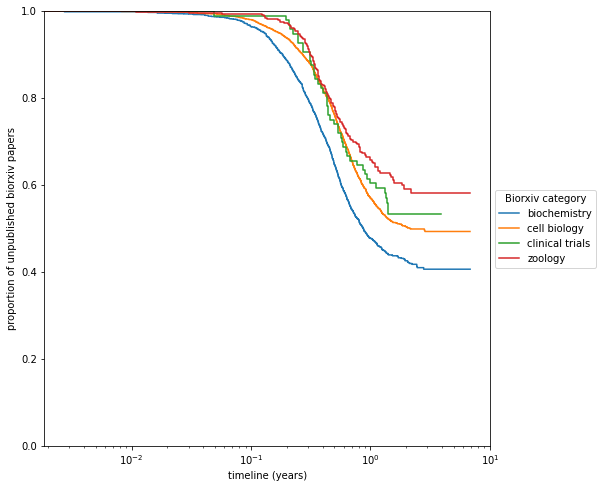

In [47]:
run_plot_by_group(merged_df, 'category', min_group_size=0,
                  selected=['biochemistry', 'cell biology', 'clinical trials', 'zoology'])

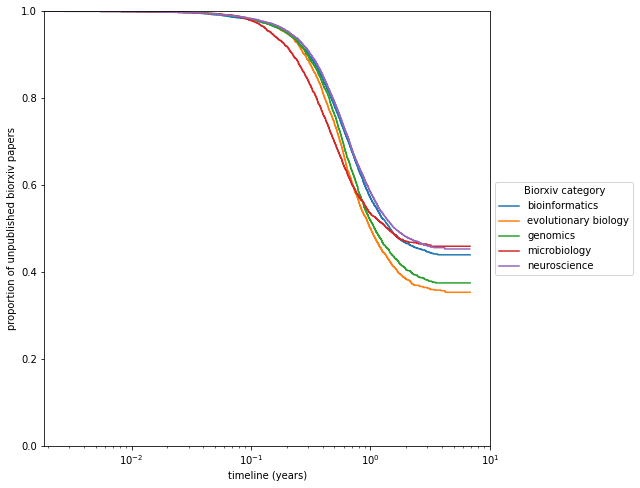

In [48]:
run_plot_by_group(merged_df, 'category', min_group_size=5000)

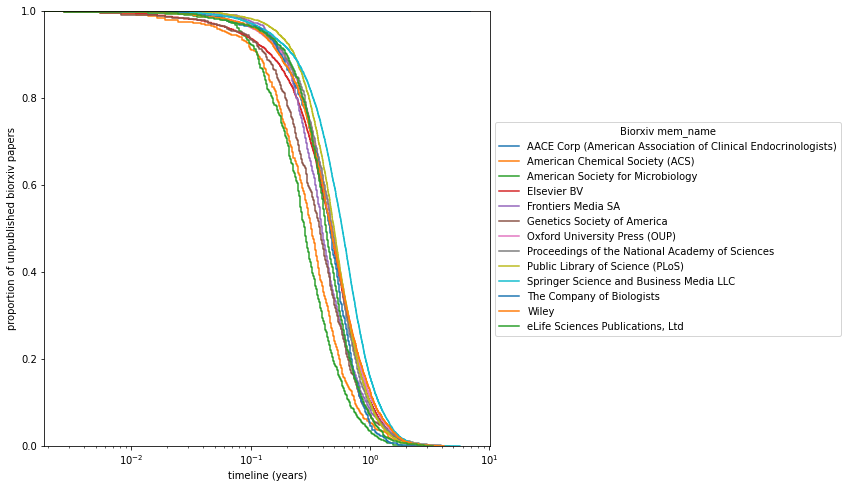

In [49]:
run_plot_by_group(merged_df, 'mem_name', min_group_size=500)

CPU times: user 1.6 s, sys: 0 ns, total: 1.6 s
Wall time: 1.6 s


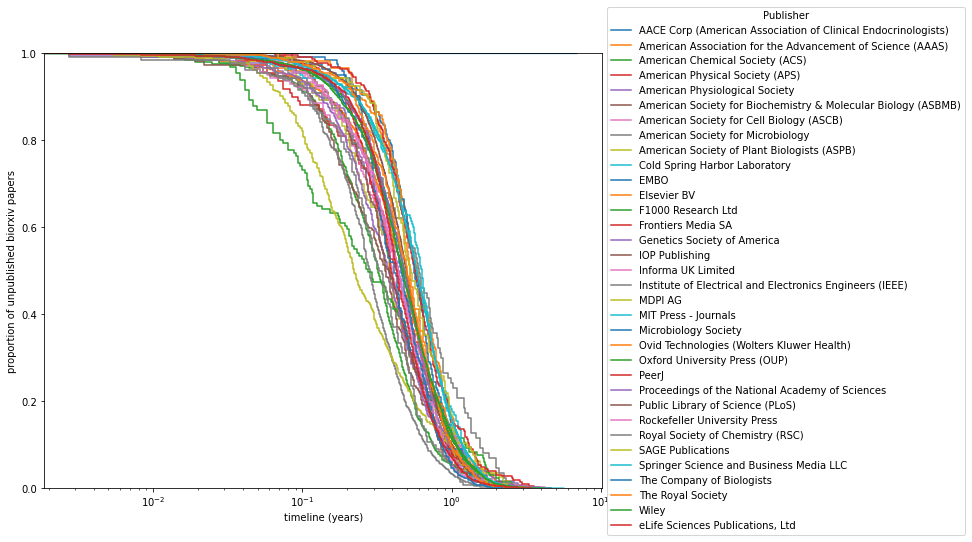

In [50]:
%%time
f = plt.figure(figsize=(10, 8))

ax = None
for category, cat_group in merged_df.groupby("mem_name"):
    if len(cat_group) > 100:
        kmf.fit(
            cat_group["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
            event_observed=cat_group["published"],
        )
        ax = kmf.plot(label=category, ax=ax, ci_show=False, logx=True)

# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Publisher")

_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

In [51]:
#merged_df["doi_prefix"] = merged_df["published_doi"].str.split("/").str[0]

CPU times: user 1.58 s, sys: 0 ns, total: 1.58 s
Wall time: 1.58 s


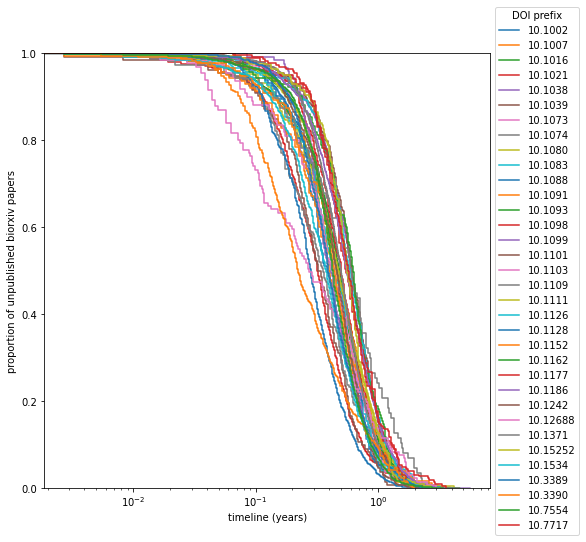

In [52]:
%%time
f = plt.figure(figsize=(10, 8))

ax = None
for category, cat_group in merged_df.groupby("doi_prefix"):
    if len(cat_group) > 100:
        kmf.fit(
            cat_group["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
            event_observed=cat_group["published"],
        )
        ax = kmf.plot(label=category, ax=ax, ci_show=False, logx=True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="DOI prefix")

_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

In [53]:
%%time
doi_prefix_df = merged_df.groupby("doi_prefix").apply(
    lambda cat_group: pd.Series(
        {
            "count": len(cat_group),
            "80th_percentile": kmf.fit(
                cat_group["observation_duration"].dt.total_seconds()
                / 60
                / 60
                / 24,
                event_observed=cat_group["published"],
            ).percentile(0.8),
        }
    )
)

/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: Ap

CPU times: user 2.85 s, sys: 32.4 ms, total: 2.89 s
Wall time: 2.84 s


/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: Ap

In [54]:
doi_prefix_df[doi_prefix_df["count"] > 50].sort_values("80th_percentile").head()

,count,80th_percentile
doi_prefix,,
10.12688,131.0,27.0
10.3390,400.0,38.0
10.1128,1168.0,56.0
10.1074,219.0,57.0
10.1364,64.0,60.0


F1000 Research Ltd <== 10.12688

MDPI AG <== 10.3390 - wikipedia notes questionable quality of peer-review

In [55]:
%%time
doi_prefix_df = merged_df.groupby("mem_name").apply(
    lambda cat_group: pd.Series(
        {
            "count": len(cat_group),
            "80th_percentile": kmf.fit(
                cat_group["observation_duration"].dt.total_seconds()
                / 60
                / 60
                / 24,
                event_observed=cat_group["published"]
            ).percentile(0.8),
        }
    )
)

/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: Ap

CPU times: user 2.15 s, sys: 12.4 ms, total: 2.16 s
Wall time: 2.12 s


/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,


In [56]:
doi_prefix_df[doi_prefix_df["count"] > 50].sort_values("80th_percentile").head(10)

,count,80th_percentile
mem_name,,
F1000 Research Ltd,131.0,27.0
MDPI AG,400.0,38.0
American Society for Microbiology,1168.0,56.0
American Society for Biochemistry & Molecular Biology (ASBMB),226.0,59.0
The Optical Society,64.0,60.0
American Chemical Society (ACS),1334.0,61.0
Royal Society of Chemistry (RSC),132.0,66.0
American Physical Society (APS),110.0,71.0
Genetics Society of America,873.0,72.0
